# QBIO 401 Final Exam
## Hirad Hosseini, Fall 2023

## Problem 1

**(15 pts) The statement of this problem includes some background on restriction
enzymes and gel electrophoresis. Be sure to answer parts (a) – (f).
Attached to this assignment are two files with coronavirus variant sequences in the
FASTA format: “omicron.fasta” and “delta.fasta.” Use the loadFASTA function from
“lecture2functions.py” (this file is also attached to this assignment) to get the sequence
data in these files.**

**(a) (1 pt) How long (in base pairs) is the sequence in the “omicron.fasta” file? How long
(in base pairs) is the sequence in the “delta.fasta” file?**

In [1]:
from lecture2functions import loadFASTA

In [2]:
om_seq = loadFASTA('omicron(1).fasta')
print('omicron: ' + str(len(om_seq)))

omicron: 29784


In [3]:
del_seq = loadFASTA('delta(1).fasta')
print('delta: ' + str(len(del_seq)))

delta: 29836


**(b) (6 pts) Write a function (or functions) that will take as input both a sequence and
one target from the “enzymelist.csv” file and will output the number of copies of
that target in the sequence.**

**I want to emphasize that the function should take the target directly from the
“enzymelist.csv” file without you making any alterations by hand. Though the file
has only nine restriction enzymes, the same function should work if the enzyme list
had thousands of restriction enzymes (and you wouldn’t want to be making manual
alterations with such a long list).**

In [4]:
import pandas as pd
import re

In [5]:
def RestrictionSites(seq: str, target: str) -> int:
    sites_cnt = 0
    target = target.replace('N', '[ACGT]').replace('Y', '[CT]').replace('R', '[AG]').replace('W', '[AT]')
    #we replace non-ATCG symbols with ATCG character sets which can be used by Regex to find matches
    matches = re.findall(target, seq) #finds all matches in sequence
    sites_cnt = len(matches) #obtains numlber of matches in sequence
    return sites_cnt #retunrs number of matches

**(c) (2 pts) Separately for each target in the “enzymelist.csv” file, use the function you
wrote in part (b) to compute how many copies of that target are in the omicron
sequence. (You should compute nine numbers, one for each restriction enzyme
target.)**

**I want to emphasize that throughout problem #1, we are considering restriction
enzymes acting separately (we are not considering different restricting enzymes
acting together).**

In [6]:
restrictionEnzymesDf = pd.read_csv('enzymelist(1).csv')

In [7]:
#iterates through all restriction enzymes in file and runs our function with given target sequence for omicron seq
for i in range(restrictionEnzymesDf.shape[0]):
    target = restrictionEnzymesDf.iloc[i, 1]
    sites_cnt = RestrictionSites(om_seq, target)
    print(f"Count for target {target} in Omicron sequence: {sites_cnt}")

Count for target CGGCCG in Omicron sequence: 0
Count for target TTATTA in Omicron sequence: 25
Count for target CGCG in Omicron sequence: 12
Count for target GGYRCC in Omicron sequence: 9
Count for target RGCGCY in Omicron sequence: 4
Count for target CACNNNGTG in Omicron sequence: 8
Count for target GGWCC in Omicron sequence: 24
Count for target CACNNNNGTG in Omicron sequence: 6
Count for target CCTNAGG in Omicron sequence: 2


**(d) (2 pts) Repeat part (c) for the delta sequence.**

In [8]:
#iterates through all restriction enzymes in file and runs our function with given target sequence for delta seq
for i in range(restrictionEnzymesDf.shape[0]):
    target = restrictionEnzymesDf.iloc[i, 1]
    sites_cnt = RestrictionSites(del_seq, target)
    print(f"Count for target {target} in Delta sequence: {sites_cnt}")

Count for target CGGCCG in Delta sequence: 0
Count for target TTATTA in Delta sequence: 25
Count for target CGCG in Delta sequence: 13
Count for target GGYRCC in Delta sequence: 9
Count for target RGCGCY in Delta sequence: 4
Count for target CACNNNGTG in Delta sequence: 8
Count for target GGWCC in Delta sequence: 24
Count for target CACNNNNGTG in Delta sequence: 6
Count for target CCTNAGG in Delta sequence: 2


**(e) (1 pt) Based on your answers to parts (c) and (d), you should see that there is exactly
one restriction enzyme such that the number of copies of the target is different in
the omicron and delta sequences. Which restriction enzyme is it?**

In [9]:
#finds enzyme corresponding to target of 'CGCG'
restrictionEnzymesDf.loc[restrictionEnzymesDf['target'] == 'CGCG']

,restriction enzyme,target,cut site at x
2,AccII,CGCG,CGxCG


The target copy count only differs for the restriction enzyme AccII, where Omicron has 12 targets while Delta has 13 targets.

**(f) (3 pts) Write a function (or functions) that will take as input both a sequence and
one restriction enzyme target and will output a list of the lengths of the pieces the
sequence will be cut into by the restriction enzyme. For the restriction enzyme you
found in part (e), run this function separately on the omicron and delta sequences
(the outputs will then be two lists of numbers).**

**The third column in the file “enzymelist.csv” tells the exact location of the cut within
the target. This location is different for each restriction enzyme. This information will
only affect the lengths of the cut pieces by a few base pairs (and it is OK if your
computed lengths are off by just a few base pairs). You should have found that one
of the pieces cut from the omicron variant is more than 100 base pairs longer than
any of the pieces cut from the delta variant, so we can use restriction enzymes and
gel electrophoresis to distinguish between omicron and delta without sequencing.**

In [10]:
def RestrictionFragments(seq: str, target: str) -> list:
    RestrictionEnzymesDf = pd.read_csv('enzymelist(1).csv')
    restrict_enz = restrictionEnzymesDf.loc[restrictionEnzymesDf['target'] == target] #finds enzyme with matching target seq
    cut_site = restrict_enz['cut site at x'].iloc[0] #obtains the cut site of matched enzyme
    res_frags = [] #stores all fragments after cutting with enzyme
    target = target.replace('N', '[ACGT]').replace('Y', '[CT]').replace('R', '[AG]').replace('W', '[AT]')
    #we replace non-ATCG symbols with ATCG character sets which can be used by Regex to find matches
    seq = re.sub(target, cut_site, seq) #substitutes target regions in given sequence with a modified target sequence containing
    #an 'x' to demarcate the cut site
    seq = seq.split('x') #splits strings at sites marked with 'x'
    for j in seq: #obtains the lengths of each fragment which is obtained after splitting
        res_frags.append(len(j))
    return res_frags #returns all fragment lengths

In [11]:
RestrictionFragments(om_seq, 'CGCG')

[333, 6026, 1991, 5063, 533, 4308, 3039, 4167, 1353, 6, 1529, 849, 587]

In [12]:
RestrictionFragments(del_seq, 'CGCG')

[309, 5177, 849, 1991, 5072, 533, 4308, 3039, 4176, 1353, 6, 1538, 849, 636]

In [13]:
#fragment lengths add up to original omicron seq length
assert sum(RestrictionFragments(om_seq, "CGCG"))==len(om_seq)

In [14]:
#fragment lengths add up to original delta seq length
assert sum(RestrictionFragments(del_seq, "CGCG"))==len(del_seq)

We see that there is a restriction fragment from the Omicron strain which is 6026 bp long. This is more than 800 bp longer than the longest fragment obtained from Delta which is 5177 bp. It appears that there is an extra cut site in the Delta strain which splits the original 6026 bp from Omicron into 5177 and 849 bp fragments in Delta. This extra cut site in the Delta strain is likely attributable to a mutation that is unique to the Delta strain that introduced a new target site which the restriction enzyme AccII is able to detect and cut.   

## Problem 2

**2. (15 pts) The statement of this problem includes some background on logistic regression.
Be sure to answer parts (a) – (f).**

**For the second problem we are going to use the cancer file “abbwdbc.csv” attached to
this assignment. This file is an abbreviated version of the file from HW 8 (many of the
columns from the file in HW 8 have been deleted). Similar to HW 8, we are going to use
logistic regression to try to predict the diagnosis column.**

**(a) (1 pt) How many rows have diagnosis “B” and how many rows have diagnosis “M”?
(These numbers are relatively balanced, so there is no need to use any of the
methods from the unbalanced data lecture, but it is a good idea to check.)**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [16]:
df = pd.read_csv('abbwdbc(1).csv')
df

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,M,17.99,10.38,122.80,1001.0,0.11840
1,M,20.57,17.77,132.90,1326.0,0.08474
2,M,19.69,21.25,130.00,1203.0,0.10960
3,M,11.42,20.38,77.58,386.1,0.14250
4,M,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100
565,M,20.13,28.25,131.20,1261.0,0.09780
566,M,16.60,28.08,108.30,858.1,0.08455
567,M,20.60,29.33,140.10,1265.0,0.11780


In [17]:
print('diagnosis M: ' + str(len(df[df['diagnosis'] == 'M'])))

diagnosis M: 212


In [18]:
print('diagnosis B: ' + str(len(df[df['diagnosis'] == 'B'])))

diagnosis B: 357


357 rows have the diagnosis 'B' while 212 rows have the diagnosis 'M'.

In [19]:
y = df['diagnosis'] #feature to be predicted
X = df.drop('diagnosis', axis=1) #all other features to be trained on 

In [20]:
# Split the data into training and test sets (use test_size=.25 and random_state=123),
# standardize the X-variables, and fit the logistic regression model on the training set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [21]:
log_reg.predict_proba(X_test[0:5])

array([[9.99459092e-01, 5.40907796e-04],
       [9.99653453e-01, 3.46547342e-04],
       [8.90653553e-02, 9.10934645e-01],
       [9.96465848e-01, 3.53415204e-03],
       [1.21547008e-02, 9.87845299e-01]])

In [22]:
log_reg.predict(X_test[0:5])

array(['B', 'B', 'M', 'B', 'M'], dtype=object)

In this problem we are going to study whether the model is more likely to make the
correct prediction if p0 is far from the threshold of 0.5 (so near 0 or 1) than if p0 is near
0.5.

**(b) (4 pts) Plot a histogram of p0 for all the rows in the test set.**

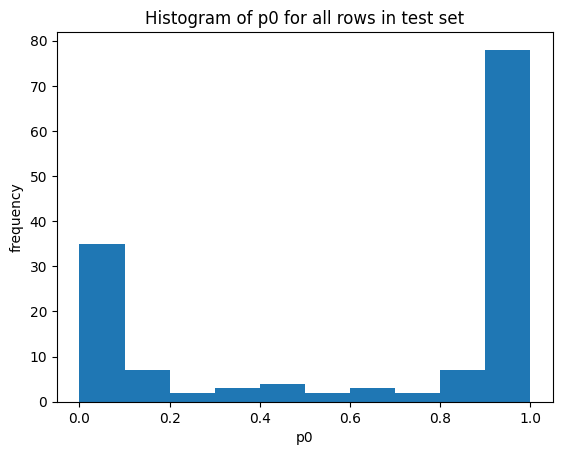

In [23]:
fig, ax = plt.subplots()
p0_values = []
for i in range(len(log_reg.predict_proba(X_test))):
    p0_values.append(log_reg.predict_proba(X_test)[i][0])
plt.hist(p0_values)
ax.set(xlabel = 'p0', ylabel = 'frequency', title = 'Histogram of p0 for all rows in test set')
plt.show()

**(c) (4 pts) Compute the accuracy (the percentage of rows the model prediction is
correct) and the confusion matrix for all the rows in the test set.**

In [24]:
print(f"The accuracy of the model is {np.mean(y_test == log_reg.predict(X_test))}")

The accuracy of the model is 0.9370629370629371


In [25]:
confusion_matrix(y_test, log_reg.predict(X_test))

array([[86,  3],
       [ 6, 48]])

**(d) (3 pts) For part (d) we will restrict ourselves to just those rows in the test set such
that p0 is less than 0.2 or greater than 0.8. For just these rows, compute the
accuracy and the confusion matrix.**

In [26]:
mask = (log_reg.predict_proba(X_test)[:, 0] < 0.2) | (log_reg.predict_proba(X_test)[:, 0] > 0.8)
predict_subset = log_reg.predict(X_test)[mask]
truth_subset = y_test[mask]

In [27]:
print(f"The accuracy of the model on our subset is {np.mean(truth_subset == predict_subset)}")

The accuracy of the model on our subset is 0.968503937007874


In [28]:
confusion_matrix(truth_subset, predict_subset)

array([[82,  1],
       [ 3, 41]])

**(e) (2 pts) For part (e) we will restrict ourselves to just those rows in the test set such
that p0 is between 0.2 and 0.8. For just these rows, compute the accuracy and the
confusion matrix**

In [29]:
intermediate_mask = (log_reg.predict_proba(X_test)[:, 0] > 0.2) & (log_reg.predict_proba(X_test)[:, 0] < 0.8)
intermediate_predict_subset = log_reg.predict(X_test)[intermediate_mask]
intermediate_truth_subset = y_test[intermediate_mask]

In [30]:
print(f"The accuracy of the model on our subset is {np.mean(intermediate_truth_subset == intermediate_predict_subset)}")

The accuracy of the model on our subset is 0.6875


In [31]:
confusion_matrix(intermediate_truth_subset, intermediate_predict_subset)

array([[4, 2],
       [3, 7]])

**(f) (1 pt) Based on your results in parts (c), (d), and (e), is the model more likely to make
the correct prediction if p0 is far from the threshold of 0.5 (so near 0 or 1) than if p0
is near 0.5?**

Based on my results, it appears that the model is more likely to make the correct prediction if p0 is far from the threshold of 0.5 as evidenced by the high accuracy of 0.968 for the subset containing extreme p0 values compared to the relatively poor accuracy of 0.687 for the subset containing intermediate p0 values. This observation makes sense because more extreme p0 values are correlated with a higher certainty of classification in logistic regression outptus. 